Neuromorphic engineering I

## Lab 3: Transistor superthreshold saturation current and drain characteristics

Group number:

Team member 1:

Team member 2:

TLJH username:

Date:

-------------------------------------------------------------------------------------------------------------------

The objective of this lab is to understand _super-threshold_ ( also called _above-threshold_ or _strong inversion_ ) transistor operation and to understand transistor drain conductance characteristics, particularly _channel length modulation_.

The specific experimental **objectives of this lab**  are as follows: 
1. To characterize drain current of a transistor as a function of gate voltage in superthreshold operation in the ohmic (triode) and saturation regions.
2. To characterize the drain saturation properties in sub- and super-threshold.
3. To characterize drain conductance (the Early effect) and how it scales with transistor length (may not be possible this year) and saturation drain current.

An intuitive and quantitative understanding of all these effects, along with the subthreshold behavior from the first week, is useful for the design of effective circuits, especially analog design of high performance amplifiers.

# 1 Terminology

- above-threshold = super-threshold =  strong inversion
- sub-threshold = below-threshold = weak inversion
- triode region = ohmic region = linear drain conductance behavior with small drain-source voltage
- saturation = large $V_{\rm ds}$ 
- overdrive = $V_{\rm g}-V_{\rm T}$
- $U_{\rm T} = kT/q$ = thermal voltage = 25mV at room temperature
- $V_{\rm T}$ = threshold voltage = 0.4V to 0.8V depending on process


# 2 Useful Quantities

The following is a list of the physical parameters and constants we
will be referring to in this lab, along with their values when
appropriate. The units that are most natural for these quantities are
also included; these units are not self--consistent, so make sure you
convert the units when appropriate.


$\epsilon_0$ :  Permittivity of vacuum = $8.86\times10^{-12} \rm{ F/m}$ 

$\epsilon_{Si}$ : Relative permittivity of ${\rm Si}$ = $11.7\epsilon_0$ 

$\epsilon_{ox}$ : Relative permittivity of ${\rm SiO_2}$ = $3.9\epsilon_0$ 

$\mu_n$ : electron surface mobility, ${\rm cm^2/V/s}$ 
 
$\mu_p$ : hole surface mobility, ${\rm cm^2/V/s}$

$C_{ox}$ : gate capacitance across the oxide per unit area,
	${\rm fF/\mu m^{2}}$ 

$C_{dep}$ : capacitance of depletion region per unit area,
	${\rm fF/\mu m^{2}}$ 

$t_{ox}$ : gate oxide thickness $\approx$
	3.8 nm for the class chip in 180 nm techology.
	
$V_T$ : threshold voltage, V ($V_{T0}$ is $V_T$ when $V_s$ = 0).


$W$ : electrical width of transistor channel, $= 4~\mu$m for both devices in this lab 

$L$ : electrical length of transistor channel, $= 4~\mu$m for both devices in this lab

$\beta$ $\equiv \mu C_{ox} W/L,\;\mu{\rm A/V^2}$ 

$V_E$ : Early voltage, characterizes drain conductance. 


# 3 Prelab

* For nFET, write the most general expression for $I_{ds}$ above threshold in terms of $V_g,\;V_s,\;V_d$ (all voltages are referenced to the bulk), and the parameters and constants given above. Leave out the drain conductance Early effect in this equation. Assume $\kappa=1$ and that $V_{Tn}>0$.

* For pFET, write the most general expression for $I_{ds}$ above threshold in terms of $V_g,\;V_s,\;V_d$ (all voltages are referenced to the bulk), and the parameters and constants given above. Leave out the drain conductance Early effect in this equation. Assume $\kappa=1$ and that $V_{Tp}<0$.

- For nFET, sketch graphs of $I_{ds}$ vs the $V_d$ for several gate voltages $V_g$ above threshold, with $V_s=0$. Indicate the ohmic and saturation regions and the behavior of the saturation voltage $V_{dsat}$ as the gate overdrive voltage increases. How do these characteristics differ from the subthreshold ones?

- For nFET, derive an expression for the current $I_{ds}$ in the ohmic region in terms of $V_g$ and $V_{ds} \equiv V_d-V_s,$. You may assume that $V_s=0.$ Sketch a graph of $I_{ds}$ vs $V_g,$ showing $V_{T0}$ and an expression for the slope.

- For nFET, state the drain voltage condition for above-threshold saturation and derive an expression for the saturation current $I_{dsat}$ in terms of $V_g$. Sketch a graph of $\sqrt{I_{dsat}}$ vs $V_g$ with $V_s=0,$ showing $V_{T0}$ and an expression for the slope. Do not consider the Early effect here.

- Calculate $C_{ox}$ for the classchip from the values given above. What is $C_{ox}$ per square micron in fF?


- Write the expression for the drain current in saturation including the Early effect, using $I_{dsat}$ to  represent the saturation current in the absence of the Early effect.  Use $V_E$ to represent the Early voltage.

# 4 Setup

## 4.1 Connect the device

In [ ]:
# import the necessary library to communicate with the hardware
import pyplane

In [ ]:
# create a Plane object and open the communication
if 'p' not in locals():
    p = pyplane.Plane()
    try:
        p.open('/dev/ttyACMx') # replace the x with you group number
    except RuntimeError as e:
        print(e)

In [ ]:
# Send a reset signal to the board, check if the LED blinks
p.reset()

In [ ]:
# Try to read something, make sure the chip responses
p.read_current(pyplane.ReadCurrentChannel.GO0)

In [ ]:
# If any of the above steps fail, delete the object, close and halt, stop the server and ask the TA to restart
# please also say your board number: ttyACMx

# del p

<a id='config_nfet'></a>
## 4.2 Configurations for N-FET

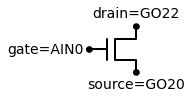

In [1]:
# uses schemdraw, you may have to install it in order to run it on your PC
import schemdraw
import schemdraw.elements as elm
d = schemdraw.Drawing()
Q = d.add(elm.NFet, reverse=True)
d.add(elm.Dot, xy=Q.gate, lftlabel='gate=AIN0')
d.add(elm.Dot, xy=Q.drain, toplabel='drain=GO22')
d.add(elm.Dot, xy=Q.source, botlabel='source=GO20')
d.draw()

To cancel out the leakage current and shunt resistance, you may want to do a subtraction.

$I_{ds} = I_{GO20}|_{V_{gs} = 0} - I_{GO20}$ 

Note: It's better to measure source because its leakage is constant in this lab

* You have to set the input voltage demultiplexer by sending a configuration event:

In [ ]:
p.send_coach_event(pyplane.CoachInputEvent(0x80600))

* Check the configuration is correct. If the measured result is not as expected, try sending the event again.

In [ ]:
# set trial voltages

In [ ]:
# read I_{ds}

<a id='config_pfet'></a>
## 4.3 Configurations for P-FET

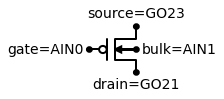

In [2]:
# uses schemdraw, you may have to install it in order to run it on your PC
import schemdraw
import schemdraw.elements as elm
d = schemdraw.Drawing()
Q = d.add(elm.PFet, reverse=True, bulk=True)
d.add(elm.Dot, xy=Q.gate, lftlabel='gate=AIN0')
d.add(elm.Dot, xy=Q.bulk, rgtlabel='bulk=AIN1')
d.add(elm.Dot, xy=Q.drain, botlabel='drain=GO21')
d.add(elm.Dot, xy=Q.source, toplabel='source=GO23')
d.draw()

Hint: To cancel out the leakage current and shunt resistance, you may want to do a subtraction:

$I_{ds} = I_{GO23}|_{V_{gs} = 0} - I_{GO23}$

Note: It's better to measure source because its leakage is constant in this lab

* You have to choose the input voltage demultiplexer by sending a configuration event (make sure LED1 blinks):

In [ ]:
p.send_coach_event(pyplane.CoachInputEvent(0x80400))

* Check the configuration is correct. If the measured result is not as expected, try sending the event again.

In [ ]:
# set trial voltages

In [ ]:
# read I_{ds}

# 5 Ohmic region

In this experiment you will characterize the *linear* dependence of the current on the gate
voltage in the strong-inversion ohmic region.

## 5.1 N-FET

**(a)** Configure the chip following [Section 4.2](#config_nfet) if you haven't

**(b)** Measure $I_{ds}$ as a function of $V_g$ in ohmic region

* What will be the fixed value for source and drain voltages?

In [ ]:
# set source voltage

In [ ]:
# set drain voltage

* For very close voltages, you may want to call `get_set_voltage` to check the actual output of the DAC.

In [ ]:
# get set voltage

* Data aquisition

In [ ]:
# sweep gate voltage

In [ ]:
# plot 

In [ ]:
# if the data looks nice, save it!

In [ ]:
# extract the valid range

In [ ]:
# fit in the valid range (you may want to go back and add the fitted line in the plot)

**(c)** Determine $V_{T0}$ and $\beta$ for both devices by fitting your data to the expression derived in the prelab

In [ ]:
# V_T0

In [ ]:
# beta

## 5.2 P-FET

**(a)** Configure the chip following [Section 4.3](#config_pfet) if you haven't

**(b)** Measure $I_{ds}$ as a function of $V_g$ in ohmic region

* What will be the fixed value for bulk, source and drain voltages?

In [ ]:
# set bulk voltage

In [ ]:
# set source voltage

In [ ]:
# set drain voltage

* For very close voltages, you may want to call `get_set_voltage` to check the actual output of the DAC.

In [ ]:
# get set voltage

* Data aquisition

In [ ]:
# sweep gate voltage

In [ ]:
# plot 

In [ ]:
# if the data looks nice, save it!

In [ ]:
# extract the valid range

In [ ]:
# fit in the valid range (you may want to go back and add the fitted line in the plot)

**(c)** Determine $V_{T0}$ and $\beta$ for both devices by fitting your data to the expression derived in the prelab

In [ ]:
# V_T0

In [ ]:
# beta

## 5.3 Comparisons

* Include a single plot showing the curves for both devices.

In [ ]:
# plot both Ids vs |Vgs|

* What is the ratio between $\beta$ for the 2 devices? Does it make sense?

* Is the relationship between $I_{ds}$ and $V_{gs}-V_T$ really linear? What is likely the cause of any discrepancy?

## 5.4 Effective surface mobility (optional)

Hint: Use the $V_{T0}$ you obtained in the last experiments but assume $\beta$ changes with $V_{gs}$ (thus $\mu_n$ and $\mu_p$ changes). **No need to measure again.**

In [ ]:
# plot mu vs Vgs for both devices in the same figure

- Why does the mobility peak and then decay instead of remaining constant? 

- What is the ratio between the peak mobilities for electrons and holes?

- How different are these values from the bulk mobilities for electrons (1350 ${\rm cm^2/V/s}$) and holes (480 ${\rm cm^2/V/s}$)? 

# 6 Drain Current in the saturation region

In this experiment you will characterize the _quadratic_ dependence of the current on the gate
voltage in the saturation region. 

## 6.1 N-FET

**(a)** Configure the chip following [Section 4.2](#config_nfet) if you haven't

**(b)** Measure $I_{ds}$ as a function of $V_g$ in saturation region

* What will be the fixed value for source and drain voltages?

In [ ]:
# set source voltage

In [ ]:
# set drain voltage

* Data aquisition

In [ ]:
# sweep gate voltage

In [ ]:
# plot 

In [ ]:
# if the data looks nice, save it!

In [ ]:
# extract the valid range and plot sqrt(Ids) vs Vgs

In [ ]:
# fit in the valid range (you may want to go back and add the fitted line in the plot)

**(c)** Determine $V_{T0}$ and $\beta$ for both devices by fitting your data to the expression derived in the prelab

In [ ]:
# V_T0

In [ ]:
# beta

## 6.2 P-FET

**(a)** Configure the chip following [Section 4.3](#config_pfet) if you haven't

**(b)** Measure $I_{ds}$ as a function of $V_g$ in ohmic region

* What will be the fixed value for bulk, source and drain voltages?

In [ ]:
# set bulk voltage

In [ ]:
# set source voltage

In [ ]:
# set drain voltage

* Data aquisition

In [ ]:
# sweep gate voltage

In [ ]:
# plot 

In [ ]:
# if the data looks nice, save it!

In [ ]:
# extract the valid range and plot sqrt(Ids) vs Vgs

In [ ]:
# fit in the valid range (you may want to go back and add the fitted line in the plot)

**(c)** Determine $V_{T0}$ and $\beta$ for both devices by fitting your data to the expression derived in the prelab

In [ ]:
# V_T0

In [ ]:
# beta

## 6.3 Comparisons

* Are the measurements of $V_{T0}$ and $\beta$ from the saturation measurement consistent with the values obtained in the ohmic region? 

* Which is a better approximation, the linear one or the quadratic?

# 7 Early effect

This experiment studies how Early voltage scales with transistor current; in particular, how valid are the simple assumptions about channel length modulation?

**You only need to do N-FET**

**(a)** Measure $I_{ds}$ vs $V_{ds}$ for different $V_{gs}$

In [ ]:
# set source voltage

In [ ]:
# measurement

* Include a single plot showing all data on a semilogy plot.

In [ ]:
# plot

In [ ]:
# if the data looks nice, save it!

* Can you see how the saturation voltage is constant for weak inversion operation, and how
it increases with the gate overdrive $V_G-V_T$ in strong inversion?

**(b)** Compute the Early voltage 

* Fit a line to the ”flat” part of each curve. Select a range of drain voltages to fit the line and use the same range for each curve, because the Early effect is actually curved in reality, and what you are actually seeing is the start of Drain Induced Barrier Lowering (DIBL) or impact ionization.

* Plot the Early voltage vs drain current on a semilogx scale.

* Comment on your results: How constant is the Early voltage with drain current? Speculate on the reasons for your observations.

# 8 Postlab

**(1)** Give an intuitive explanation to why the relationship between the above-threshold current and the gate voltage is linear in the ohmic region but quadratic in the saturation region. Explain the physics, not just the equations.

**(2)** In the subthreshold region:

* Is the current linearly proportional to the gate voltage in the ohmic region like it is above threshold? Why? Explain the physics and not just the equations.

* Does the drain-source voltage at which the current saturates depend on the gate voltage? Why? Explain the physics and not just the equations.

**(3)** This question probes the basic mechanism of voltage amplifier design using MOS transistors.

Imagine we want to use a single transistor together with a perfect current source to make an inverting amplifier with voltage gain, as in the figure below.

We are interested in calculating the _intrinsic small-signal voltage gain_ of this transistor.

We use an N-FET, ground the source and connect the  drain to a current source coming from the positive supply.
We apply a gate voltage, and measure the drain voltage.

Suppose the drain is hooked up to a perfect current source of infinite impedance that sources a known current $I_b$.

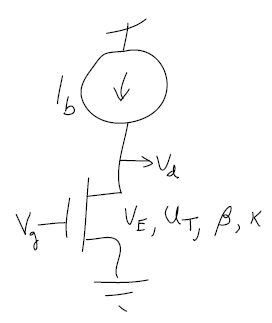

* Should $I_b$ be bigger or smaller than $I_{dsat}$?

* Calculate the voltage gain $A$ from gate to drain (that is, $A=\partial V_d/\partial V_g$) in weak and strong inversion operation in terms of the bias current $I_b$ and the usual transistor parameters $\kappa$, $\beta$, $U_T=kT/q$, and $V_E$.

# 9 Congratulations

If you did everything in this lab, you have done a lot. This is probably the most difficult but also one of the most important labs, because practical and intuitive knowledge of transistor characteristics is crucial in understanding and synthesizing new circuits.

# 10 What we expect

How transistors work above threshold.  

What is the linear or triode region and what is the saturation region?

How does the linear region depend on gate and threshold voltage?

What is the _overdrive_?

What is the specific current?

How the Early effect comes about?

Typical values for Early voltage.

How to sketch graphs of transistor current vs gate voltage and drain-source voltage.

How above-threshold transistors go into saturation and why the saturation voltage is equal to the gate overdrive.
Can you write the above-threshold current equations?

How does above-threshold current depend on $W/L$, $C_{ox}$, and mobility $\mu$?

How do transconductance and drain resistance combine to generate voltage gain? 
And what is the intrinsic voltage gain of a transistor?

What effect does velocity saturation have on transistor operation, specifically, how does it change the relation between saturation current and gate voltage? What is DIBL (drain induced barrier lowering) and II (impact ionization)?

What is the dominant source of mismatch?

How does transistor mismatch scale with transistor size?

What are typical values of transistor threshold voltage mismatch? 